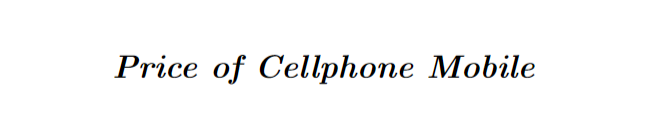
                

Contents

1.  `Data Information`
2.  `Data Preprocesing`
     *   Include Libraries
     *   Import Data
     *   Explore Data
     *   Missing Values
     *   Rename Columns
3.  `Data Visualization
     *   Distribution plot
     *   Pairplot
     *   Correlation
4.   `Feature Engineering
     *   Decompose: Inputs and Outputs
     *   Standardizating Data
5.  `Machine arning Models: Supervised Learning
     *  ` Linear Regresion`
6.  `Results and conclusions`
7.  `References`

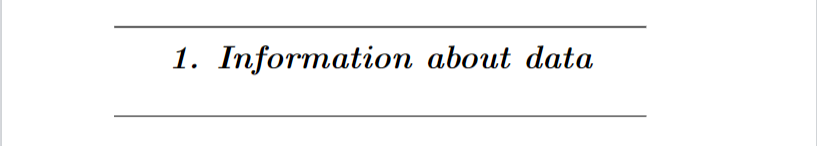


`Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. `
`
* **Product_id** : `ID of each cellphone.`
* **Price** : `Price of each cellphone.`
* **Sale** : `Sales number.`
* **weight** : `Weight of each cellphone.`
* **resoloution** :  `Resoloution of each cellphone.`
* **ppi** : `Phone Pixel Density.`
* **cpu core** : `Type of CPU core in each cellphone.`
* **cpu freq** : `CPU Frequency in each cellphone.`
* **internal mem** : `Internal memory of each cellphone.`
* **ram** : `RAM of each cellphone.`


`The goal of this notebook is estimate the price of mobile phones using the above features.`

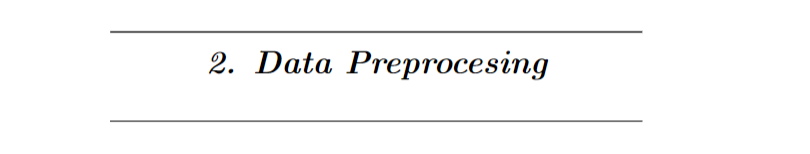

## 2.1 Import Libraries

In [1]:
# treatment of data
# ==============================================================================
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## 2.2 Load Data

In [2]:
#Import data
# ==============================================================================
data =pd.read_csv("/kaggle/input/mobile-price-prediction/Cellphone.csv")

## 2.3 Exploring Data

In [3]:
#Shape of data
# ==============================================================================
data.shape

(161, 14)

In [4]:
#view the first 5  elements of data
#===============================================================================
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
#Info of data
# ==============================================================================
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
# Info data
# ==============================================================================
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


## 2.4 Missing Values

In [7]:
#Looking for null values
# ==============================================================================
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

## 2.5 Rename Columns

In [8]:
# Modify the name of the columns 
# ==============================================================================
colname = ["Product_id", "Price", "Sale", "Weight" , "Resolution", "PPI", "Cpu_Core","Cpu_Freq",
           "Internal", "RAM", "RearCam", "FrontCam", "Battery", "Thickness"]
data.columns = colname
data

,Product_id,Price,Sale,Weight,Resolution,PPI,Cpu_Core,Cpu_Freq,Internal,RAM,RearCam,FrontCam,Battery,Thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


**Summary of Exploring data**

*   `The data contains 161 observations and 14 variables.`
*   `All our variables are numerical. `
*   `Our output will be "Price".`
*   `The data does not contain missing values.`

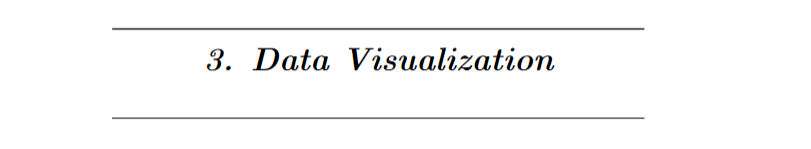

## 3.1 Distribution plot

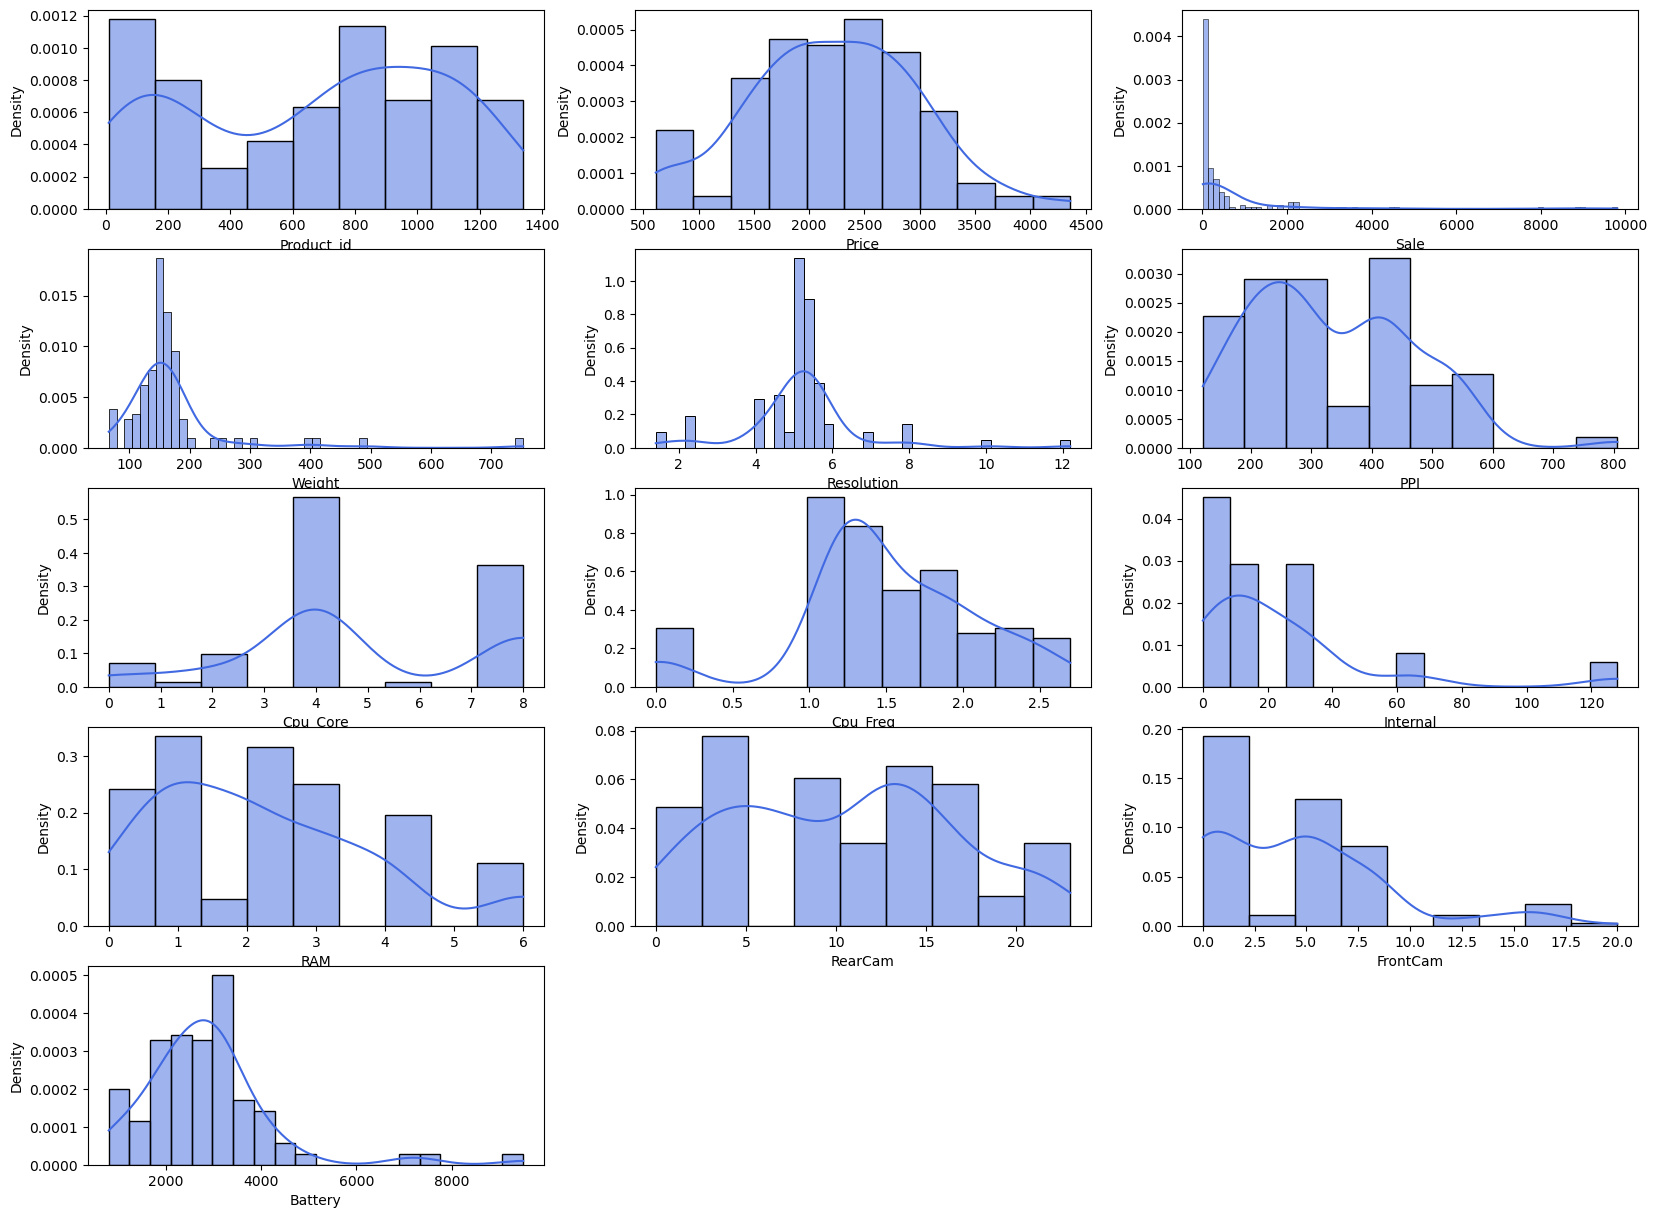

In [9]:
# Distribution visualization 
# ==============================================================================
plt.figure(figsize=(20,15))
j = 1
for i in data.iloc[:,:-1].columns:
    plt.subplot(5,3,j)
    sns.histplot(data[i], stat = "density", kde = True , color = "royalblue")
    j+=1
plt.show()

## 3.2 PairPlot

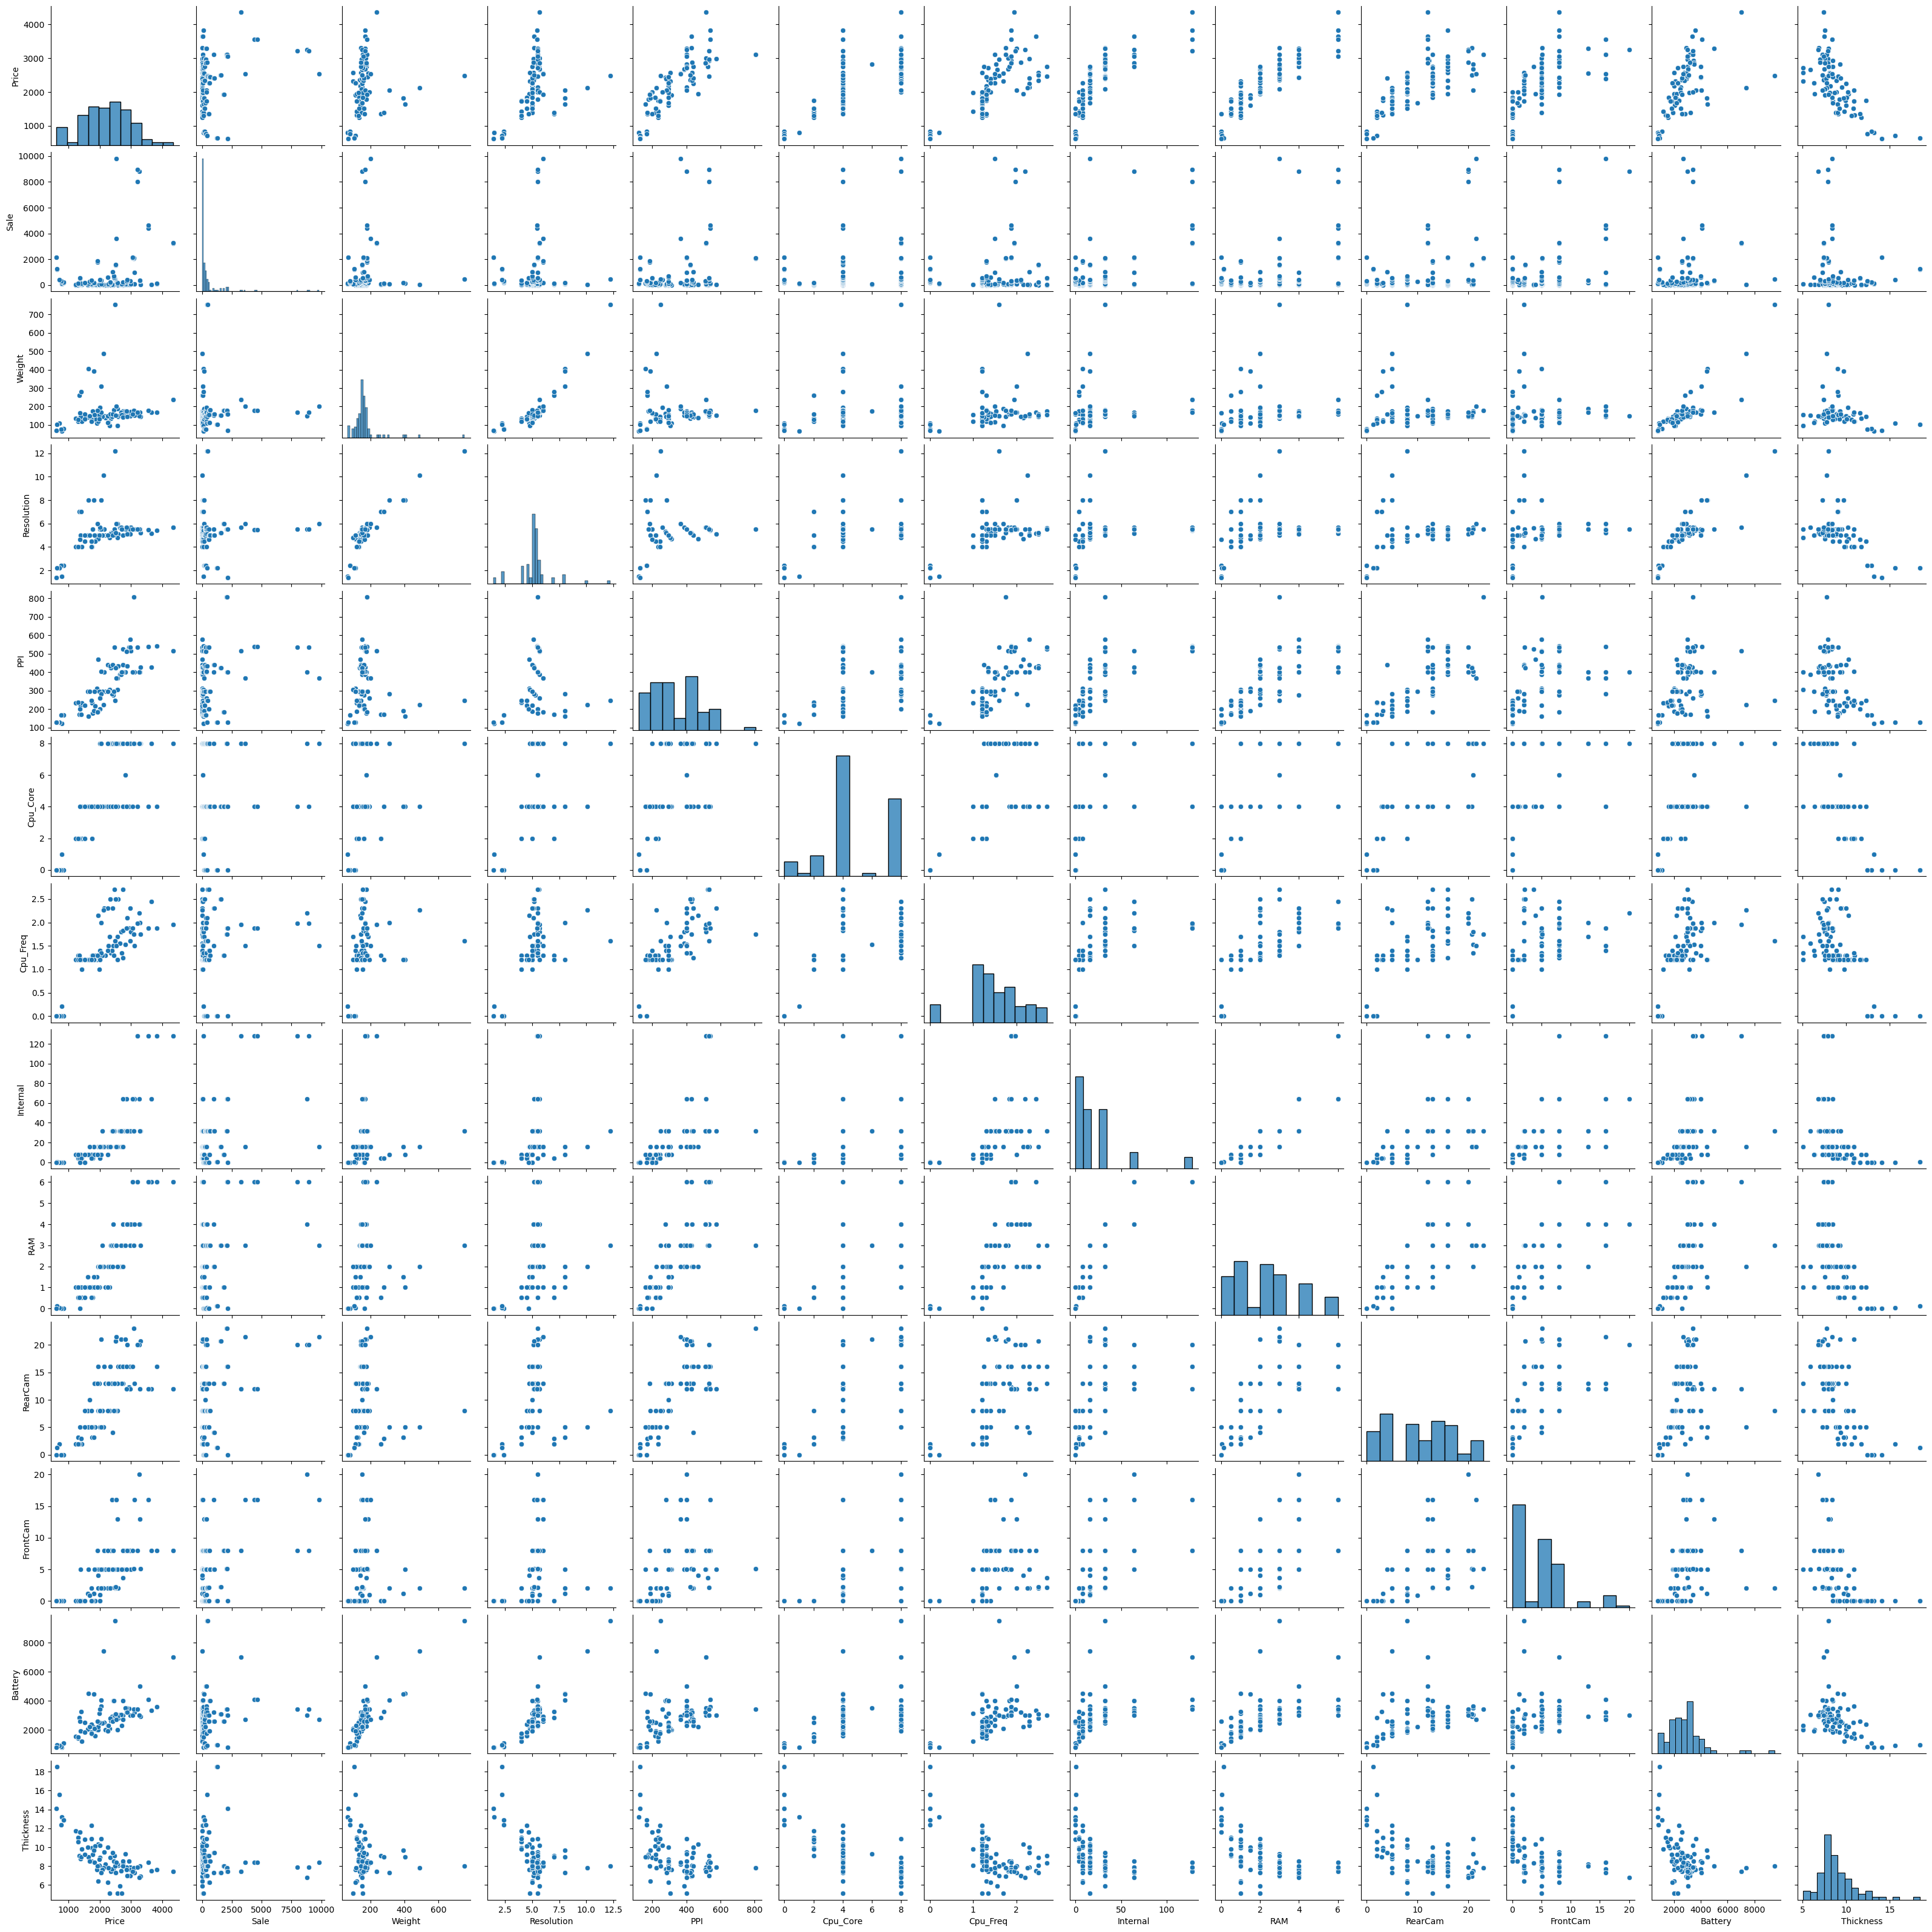

In [10]:
# Scatter visualization
# ==============================================================================
sns.pairplot(data= data.drop(["Product_id"], axis =1))
plt.show()

## 3.3 CorrelationPlot

`Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Types of Correlation`

*   `Perfect Positive Correlation  1`
*   `High Positive Correlation 0.9`
*   `Low Positive Correlation 0.5 `
*   `No correlation 0`
*   `Low Negative Correlation -0.5`
*   `High Negative Correlation -0.9`
*   `Perfect Negative Correlation -1`

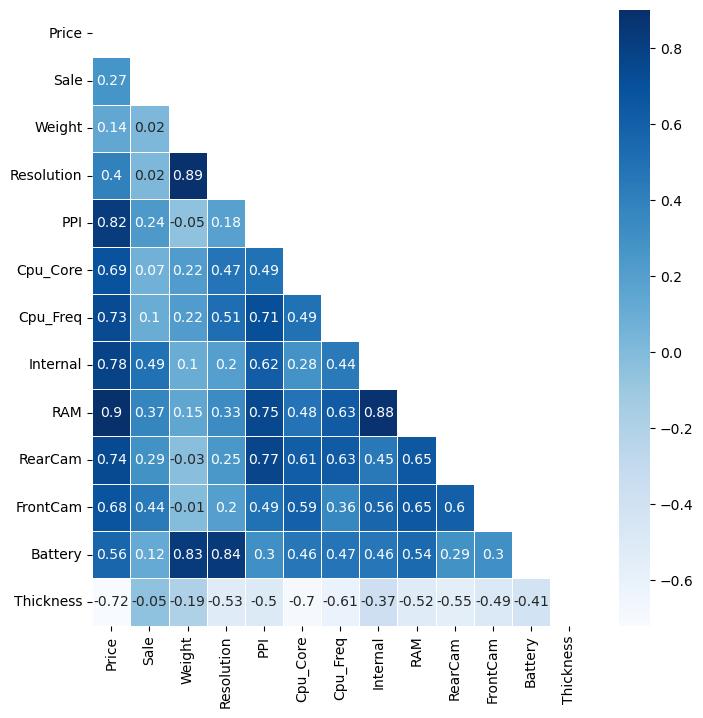

In [11]:
# Heatmap correlation visualization
# ==============================================================================
plt.figure(figsize=(8,8))
corr = round(data.drop(["Product_id"], axis =1 ).corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cmap = "Blues")
plt.show()

**Summary of data visualization**

* `The Price column presents a high positive correlation with the variables 
["PPI","Cpu_Freq", "Internal", "RAM", "RearCam", "FrontCam"].`
* `The Price column presents a low positive correlation with the variables
["Resolution","Cpu_Core","FrontCam", "Battery"]`
* `The Price Column presents a high negative correlation with the variable ["Thickness"] `

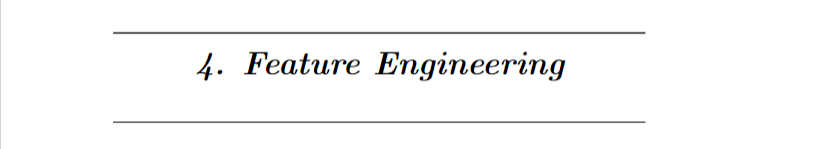

## 4.1 Decompose data into Inputs and Outputs
`The goal of this work is to estimate the price of mobile phone, so we need to split the data into inputs   ["Resolution", "PPI", "Cpu_Core","Cpu_Freq","Internal", "RAM", "RearCam", "FrontCam", "Battery", "Thickness"] and  output ['Price']`

In [12]:
# Decompose data into inputs and outputs
# ==============================================================================
X = data.drop(["Product_id", "Sale","Weight","Price"], axis =1)
y = data.Price

## 4.2 Standardizating Data

`When we analyze data, we often deal with datasets whose features vary in magnitude and units. For example, variables such as "cpu freq"  and "battery" drastically differ in magnitude. So that by applying machine learning techniques to these variables, the algorithm will consider the variable "battery" more dominant than "cpu freq"  due to their difference in magnitudes. A way to avoid this conflict is to standardize said variables. i.e.  with
` $\mu$ = 0 or
`and` $\sigma =1$.
`To make uniform these variables, we need to import the Standard_Scalar library, which has as its objective to standardize said variables such that each variable contributes equally to our analysis. `

In [13]:
# Import StandardScalar package
# ==============================================================================
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

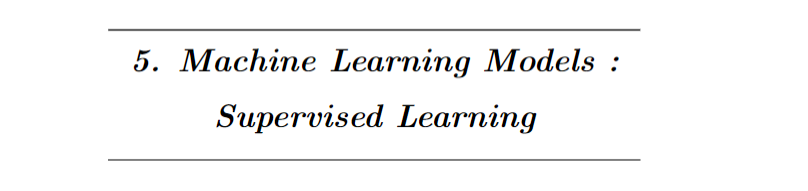

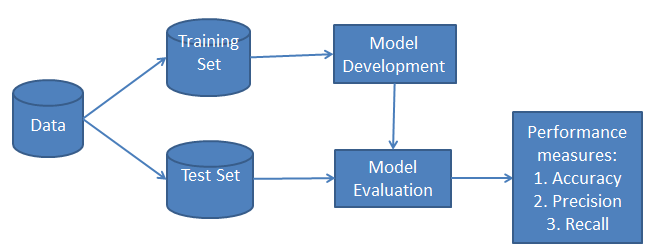

##  5.1  Splitting Data

In [14]:
# As with all predictive studies, it is not only important to fit the model,  
# but also to quantify its capacity to predict new observations.
# To perform this evaluation, we divide the data into two groups, one of them 
# into train data and the other into test data.
# The following code perform this task, decompose data into train and test data.
# Obs: 
# If we use any integer value for random_state, then it will produce the same result for an integer value. 
# If we change the value of random_state, then only the result will be different.
# If we write none, it will produce different results in every execution. 
# ==============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Linear Regression

### Creation of the model

In [15]:
#Libraries for Linear Regression.
# ==============================================================================
from sklearn.linear_model import LinearRegression

In [16]:
# Creation of the model.
# ==============================================================================
modelo = LinearRegression()


In [17]:
# Training the model
# ==============================================================================
modelo.fit(X_train , y_train)

LinearRegression()

### Information of the Model

In [18]:
# Knowning the intercept and the coeficients of the independents variables.
# ==============================================================================
col =data.drop(["Product_id", "Sale","Weight", "Price"], axis =1).columns
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(col, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: 2213.650601730732
Coeficiente: [('Resolution', -149.46961766922453), ('PPI', 150.6614361025387), ('Cpu_Core', 127.0856160965189), ('Cpu_Freq', 89.94846070889832), ('Internal', 138.94537659761534), ('RAM', 175.72077686871904), ('RearCam', 18.91884502796941), ('FrontCam', 19.62820968498704), ('Battery', 162.20848744245217), ('Thickness', -173.1464636183603)]
Coeficiente de determinación R^2: 0.9520460023025747


### Predictions 

In [19]:
# Once training the model, we evaluate the predictive capacity employing the test data.
# ==============================================================================
predictions = modelo.predict(X_test)
print(predictions)

[ 889.83079506 1864.60838744 2645.96007853 1519.54475511 1621.36149814
 1862.39815299  889.83079506 1323.86700994 2377.57043131 2645.96007853
 1394.18451921 1615.20343134 1737.99698487 2832.47775511 2232.8592747
 2211.63770675 2569.58864593 3049.15871321 1443.20839181 2211.63770675
 2323.03487647 1737.99698487 1907.41268717 2440.94343292 3119.41861839
 4150.53593699 2415.23166969 3430.78197252 2668.39488513 2503.66509093
 3041.19253164 2584.6438116  2542.60926854]


### Error

In [20]:
# Import mean_squared_error library to find our error.
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print("")
print(f"The error (rmse) of test is: {rmse}")


The error (rmse) of test is: 152.2012804562195


## 5.3 Visual Inspection

### Actual Value - Predicted Value

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  if __name__ == "__main__":


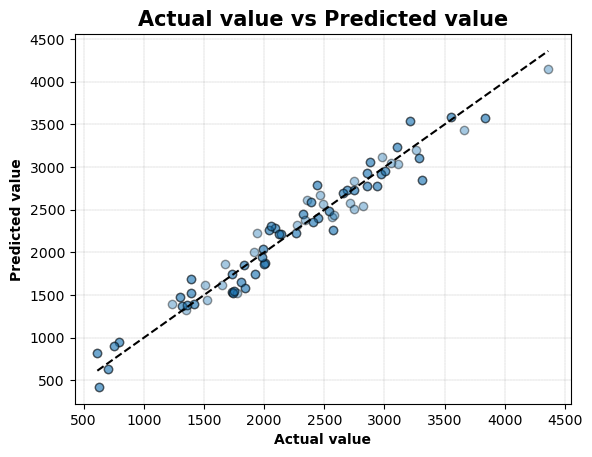

In [21]:
# Predicting values
# ==============================================================================
prediccion_train = modelo.predict(X_train)
residuos_train   = prediccion_train - y_train
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)

plt.title('Actual value vs Predicted value', fontsize = 15, fontweight = "bold")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black')
plt.ylabel("Predicted value" , weight = "bold")
plt.xlabel("Actual value", weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.show()

### Residues of the Model

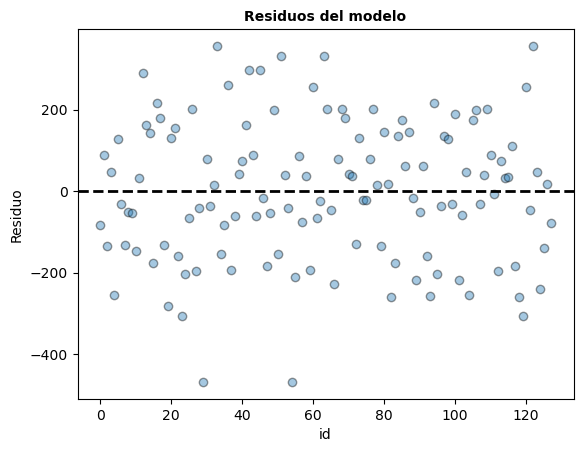

In [22]:
# The residues must be distributed in homogeneous way along the x-axis,  
# but they must present the same variability along the x-axis (homocedasticity)
plt.scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.title('Residuos del modelo', fontsize = 10, fontweight = "bold")
plt.xlabel('id')
plt.ylabel('Residuo')
plt.show()

### Distribution of Residues

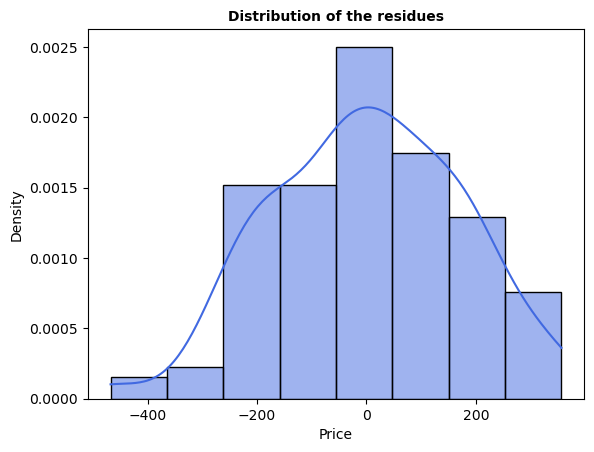

In [23]:
# To verify the above computation is valid,  we need to check that our residues must
# independent and present a normal distribution with mean = 0 and variance σ^2.
# ==============================================================================
sns.histplot(residuos_train, stat = "density", kde = True, color = "royalblue")
plt.title('Distribution of the residues', fontsize = 10,
                     fontweight = "bold")
plt.xlabel("Price")
plt.show()

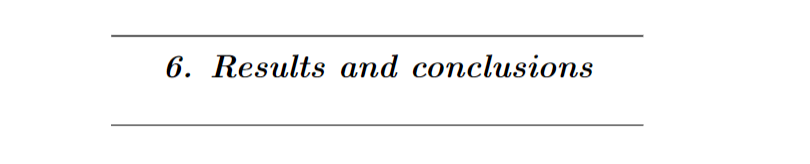


* `The model of linear regression presents the following form:`
 
\begin{equation}
\fbox{$\mathbf{Price = 2213.650 -149.469\times Resolution + 150.661\times PPI+127.085\times CpuCore\\+ 89.948\times CpuFreq+138.945\times Internal + 175.720\times RAM+18.918\times RearCam\\+ 19.628\times FrontCam + 162.208\times Battery -173.146\times Thickness}$}
\end{equation}

* `The error (rmse) of the test is equal to 152.20, that is, our predictions go away an average of 152.20 units from the real value.`

* `The variables that described our model have a` $R^{2}= 0.95$,` that is, the model is capable of explaining 95% of the observed variability in the Price cellphone.`

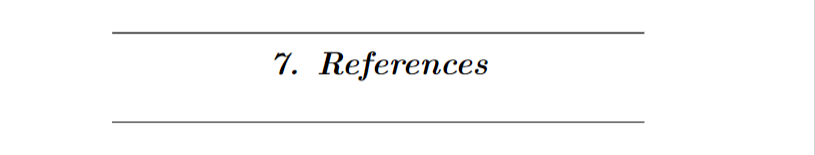

   1. https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf
   2. https://medium.com/@johanrenzosm/meu-primeiro-post-construindo-um-modelo-de-regress%C3%A3o-linear-simples-e75d71114606
   3. https://www.kaggle.com/code/johanrenzosm/medium-modelo-simples-de-regress-o-linear
   4. Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

**Thank you for looking at my notebook. I greatly appreciate tips, suggestions, and upvotes** :D